In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=dd645cb86df63608a5d8576be868d82bb3ecbfaf9fe5c94955b90d3c1a7a79b5
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
!pip install graphframes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
!curl -L -o "/usr/local/lib/python3.6/dist-packages/pyspark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar" http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   164  100   164    0     0    379      0 --:--:-- --:--:-- --:--:--   379
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file 
100   146  100   146    0     0    118      0  0:00:01  0:00:01 --:--:--   398
curl: (23) Failure writing output to destination


In [ ]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

In [ ]:
spark = SparkSession.builder.master("local[*]").config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.2-s_2.12").getOrCreate()

In [ ]:
vertices = spark.createDataFrame([('1', 'Carter', 'Derrick', 50),
                                  ('2', 'May', 'Derrick', 26),
                                 ('3', 'Mills', 'Jeff', 80),
                                  ('4', 'Hood', 'Robert', 65),
                                  ('5', 'Banks', 'Mike', 93),
                                 ('98', 'Berg', 'Tim', 28),
                                 ('99', 'Page', 'Allan', 16)],
                                 ['id', 'name', 'firstname', 'age'])
edges = spark.createDataFrame([('1', '2', 'friend'),
                               ('2', '1', 'friend'),
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('2', '3', 'follows'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                              ('98', '99', 'friend'),
                              ('99', '98', 'friend')],
                              ['src', 'dst', 'type'])

In [ ]:
g = GraphFrame(vertices, edges)
## Take a look at the DataFrames
print("Veritices")
g.vertices.show()
print("Edges")
g.edges.show()
print("Degrees")
g.degrees.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


Veritices
+---+------+---------+---+
| id|  name|firstname|age|
+---+------+---------+---+
|  1|Carter|  Derrick| 50|
|  2|   May|  Derrick| 26|
|  3| Mills|     Jeff| 80|
|  4|  Hood|   Robert| 65|
|  5| Banks|     Mike| 93|
| 98|  Berg|      Tim| 28|
| 99|  Page|    Allan| 16|
+---+------+---------+---+

Edges
+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+

Degrees


/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+------+
| id|degree|
+---+------+
|  3|     7|
|  1|     4|
|  4|     3|
|  2|     3|
| 98|     2|
| 99|     2|
|  5|     3|
+---+------+



In [ ]:
nodes = list(map(lambda r: r.id, g.vertices.select("id").collect()))
nodes

['1', '2', '3', '4', '5', '98', '99']

In [ ]:
edges = [(r.src, r.dst) for r in g.edges.select("src", "dst").collect()]
edges

[('1', '2'),
 ('2', '1'),
 ('3', '1'),
 ('1', '3'),
 ('2', '3'),
 ('3', '4'),
 ('4', '3'),
 ('5', '3'),
 ('3', '5'),
 ('4', '5'),
 ('98', '99'),
 ('99', '98')]

# Drawing graph using networkx

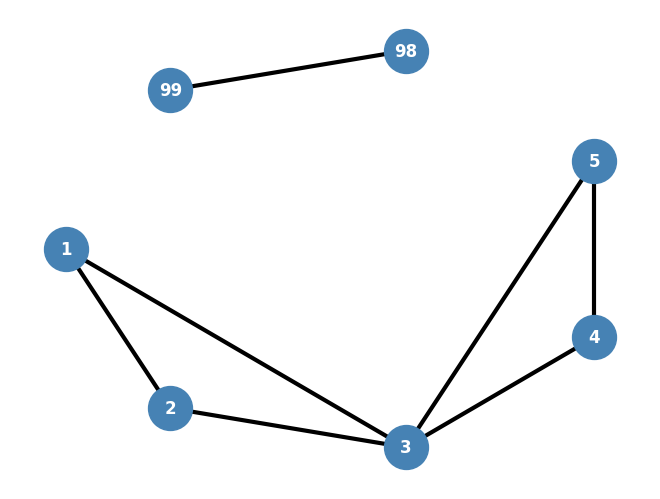

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

options = {
    'node_color': 'steelblue',
    "font_color": "white",
    'node_size': 1000,
    'width': 3,
    'font_weight': 'bold'
}

nx.draw_shell(G, with_labels=True, **options)

In [ ]:
g.edges.filter('type == "friend"').show()

+---+---+------+
|src|dst|  type|
+---+---+------+
|  1|  2|friend|
|  2|  1|friend|
|  3|  1|friend|
|  1|  3|friend|
|  3|  4|friend|
|  4|  3|friend|
|  5|  3|friend|
|  3|  5|friend|
| 98| 99|friend|
| 99| 98|friend|
+---+---+------+



## Motif finding

Finding motifs helps to execute queries to discover structural patterns in graphs. Network motifs are patterns that occur repeatedly in the graph and represent the relationships between the vertices. GraphFrames motif finding uses a declarative Domain Specific Language (DSL) for expressing structural queries. The query can be invoked by using the find-function, where the motif (in quotation marks) is expressed as the first parameter of the function. The following example will search for pairs of vertices a,b connected by edge e and pairs of vertices b,c connected by edge e2. It will return a DataFrame of all such structures in the graph, with columns for each of the named elements (vertices or edges) in the motif.

In [ ]:
g.find("(a)-[e]->(b); (b)-[e2]->(c)").show()

+--------------------+---------------+--------------------+---------------+--------------------+
|                   a|              e|                   b|             e2|                   c|
+--------------------+---------------+--------------------+---------------+--------------------+
|{1, Carter, Derri...| {1, 2, friend}|{2, May, Derrick,...| {2, 1, friend}|{1, Carter, Derri...|
|{5, Banks, Mike, 93}| {5, 3, friend}|{3, Mills, Jeff, 80}| {3, 1, friend}|{1, Carter, Derri...|
|{4, Hood, Robert,...| {4, 3, friend}|{3, Mills, Jeff, 80}| {3, 1, friend}|{1, Carter, Derri...|
|{2, May, Derrick,...|{2, 3, follows}|{3, Mills, Jeff, 80}| {3, 1, friend}|{1, Carter, Derri...|
|{1, Carter, Derri...| {1, 3, friend}|{3, Mills, Jeff, 80}| {3, 1, friend}|{1, Carter, Derri...|
|{3, Mills, Jeff, 80}| {3, 1, friend}|{1, Carter, Derri...| {1, 2, friend}|{2, May, Derrick,...|
|{2, May, Derrick,...| {2, 1, friend}|{1, Carter, Derri...| {1, 2, friend}|{2, May, Derrick,...|
|{3, Mills, Jeff, 80}| {3, 1, 

In [ ]:
mutualFriends = (g
                 .find("(a)-[]->(b); (b)-[]->(c); (c)-[]->(b); (b)-[]->(a)")
                 .dropDuplicates()
                )

mutualFriends.show(100, False)

+------------------------+------------------------+------------------------+
|a                       |b                       |c                       |
+------------------------+------------------------+------------------------+
|{4, Hood, Robert, 65}   |{3, Mills, Jeff, 80}    |{4, Hood, Robert, 65}   |
|{3, Mills, Jeff, 80}    |{1, Carter, Derrick, 50}|{2, May, Derrick, 26}   |
|{4, Hood, Robert, 65}   |{3, Mills, Jeff, 80}    |{1, Carter, Derrick, 50}|
|{5, Banks, Mike, 93}    |{3, Mills, Jeff, 80}    |{1, Carter, Derrick, 50}|
|{3, Mills, Jeff, 80}    |{1, Carter, Derrick, 50}|{3, Mills, Jeff, 80}    |
|{5, Banks, Mike, 93}    |{3, Mills, Jeff, 80}    |{5, Banks, Mike, 93}    |
|{5, Banks, Mike, 93}    |{3, Mills, Jeff, 80}    |{4, Hood, Robert, 65}   |
|{1, Carter, Derrick, 50}|{2, May, Derrick, 26}   |{1, Carter, Derrick, 50}|
|{1, Carter, Derrick, 50}|{3, Mills, Jeff, 80}    |{4, Hood, Robert, 65}   |
|{2, May, Derrick, 26}   |{1, Carter, Derrick, 50}|{3, Mills, Jeff, 80}    |

In [ ]:
mutualFriends.printSchema()

root
 |-- a: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- age: long (nullable = true)
 |-- b: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- age: long (nullable = true)
 |-- c: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- age: long (nullable = true)



In [ ]:
mutualFriends.filter('a.id == 2 and c.id == 3').show(10, False)

+---------------------+------------------------+--------------------+
|a                    |b                       |c                   |
+---------------------+------------------------+--------------------+
|{2, May, Derrick, 26}|{1, Carter, Derrick, 50}|{3, Mills, Jeff, 80}|
+---------------------+------------------------+--------------------+



## Triangle Count

In [ ]:


g.triangleCount().show()



+-----+---+------+---------+---+
|count| id|  name|firstname|age|
+-----+---+------+---------+---+
|    2|  3| Mills|     Jeff| 80|
|    1|  1|Carter|  Derrick| 50|
|    1|  2|   May|  Derrick| 26|
|    0| 98|  Berg|      Tim| 28|
|    0| 99|  Page|    Allan| 16|
|    1|  5| Banks|     Mike| 93|
|    1|  4|  Hood|   Robert| 65|
+-----+---+------+---------+---+



## Page Rank


In [ ]:
pr = g.pageRank(resetProbability=0.15, tol=0.01)
## look at the pagerank score for every vertex
pr.vertices.show()
## look at the weight of every edge
pr.edges.show()

+---+------+---------+---+------------------+
| id|  name|firstname|age|          pagerank|
+---+------+---------+---+------------------+
|  3| Mills|     Jeff| 80| 1.853919642738813|
| 98|  Berg|      Tim| 28|1.0225331112091938|
| 99|  Page|    Allan| 16|1.0225331112091938|
|  5| Banks|     Mike| 93|0.9703579134677663|
|  1|Carter|  Derrick| 50|0.9055074972891308|
|  4|  Hood|   Robert| 65|0.6873519241384106|
|  2|   May|  Derrick| 26|0.5377967999474921|
+---+------+---------+---+------------------+

+---+---+-------+------------------+
|src|dst|   type|            weight|
+---+---+-------+------------------+
|  3|  5| friend|0.3333333333333333|
|  3|  1| friend|0.3333333333333333|
|  3|  4| friend|0.3333333333333333|
| 98| 99| friend|               1.0|
| 99| 98| friend|               1.0|
|  5|  3| friend|               1.0|
|  1|  3| friend|               0.5|
|  1|  2| friend|               0.5|
|  4|  3| friend|               0.5|
|  4|  5|follows|               0.5|
|  2|  3|fol

## Shortest Path


In [ ]:
g.shortestPaths(landmarks=["1", "5"]).show()

+---+------+---------+---+----------------+
| id|  name|firstname|age|       distances|
+---+------+---------+---+----------------+
|  3| Mills|     Jeff| 80|{5 -> 1, 1 -> 1}|
| 98|  Berg|      Tim| 28|              {}|
| 99|  Page|    Allan| 16|              {}|
|  5| Banks|     Mike| 93|{5 -> 0, 1 -> 2}|
|  1|Carter|  Derrick| 50|{5 -> 2, 1 -> 0}|
|  4|  Hood|   Robert| 65|{5 -> 1, 1 -> 2}|
|  2|   May|  Derrick| 26|{5 -> 2, 1 -> 1}|
+---+------+---------+---+----------------+

